# Notebooks as modules can be used as formal tests

Formal Tests...

* ... promote reproducibility and are reusable.
* ... transform a hypothesis into an assumption.
* ... accelerate innovation by avoiding redundancy.
* ... including narrative improve the ability to share interactive compute.

In [6]:
    
    __file__ = globals().get('__file__', 'importing.ipynb')
    from IPython import get_ipython
    from IPython.display import Markdown
    o = __name__ == '__main__'
    with __import__('importnb').Notebook():

        try: 
            from .util import __ipython__
        except: 
            from util import __ipython__
            if __ipython__:
                %reload_ext pidgin
                %pidgin conventions markdown 

# The first test is the hardest to write
    
    __import__('IPython').display.YouTubeVideo("fA7LGqwjhYs")

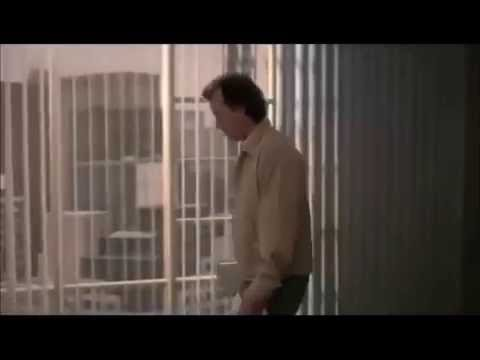

In [2]:
# The first test is the hardest to write
    
    __import__('IPython').display.YouTubeVideo("fA7LGqwjhYs")

In [3]:
    import doctest # is part of the standard lib
    
`doctest`s are strings that contain tests.  Generally they are defined in [docstrings (PEP 257)](https://www.python.org/dev/peps/pep-0257/).
    
    def test_my_string(): 
        """>>> assert '💯'"""    
        
    class testMyString:
        """>>> assert '👌'"""
        
> Doctests are my first approach to formal notebook testing

    import doctest # is part of the standard lib
    
`doctest`s are strings that contain tests.  Generally they are defined in [docstrings (PEP 257)](https://www.python.org/dev/peps/pep-0257/).
    
    def test_my_string(): 
        """>>> assert '💯'"""    
        
    class testMyString:
        """>>> assert '👌'"""
        
> Doctests are my first approach to formal notebook testing

In [4]:
# Running doctest   

Doctests run transparently when `__name__ == '__main__'`.

    if __name__ == '__main__':
        doctest.testmod(verbose=2)

# Running doctest   

Doctests run transparently when `__name__ == '__main__'`.

    if __name__ == '__main__':
        doctest.testmod(verbose=2)

Trying:
    assert '👌'
Expecting nothing
ok
Trying:
    assert '💯'
Expecting nothing
ok
1 items had no tests:
    __main__
2 items passed all tests:
   1 tests in __main__.testMyString
   1 tests in __main__.test_my_string
2 tests in 3 items.
2 passed and 0 failed.
Test passed.


In [5]:
<hr/><hr/><hr/><hr/><hr/>

# This notebook - `testing.ipynb` - imports itself `testing` and `importing`
    
    from importnb import Notebook, reload
    with Notebook():
        try:
            import importing, testing
        except:
            from . import importing, testing
            
Doctests may test a module too.

    if __name__ == '__main__':
        doctest.testmod(testing, verbose=2)
            

<hr/><hr/><hr/><hr/><hr/>

# This notebook - `testing.ipynb` - imports itself `testing` and `importing`
    
    from importnb import Notebook, reload
    with Notebook():
        try:
            import importing, testing
        except:
            from . import importing, testing
            
Doctests may test a module too.

    if __name__ == '__main__':
        doctest.testmod(testing, verbose=2)
            

Trying:
    assert True
Expecting nothing
ok
Trying:
    assert '👌'
Expecting nothing
ok
Trying:
    assert '💯'
Expecting nothing
ok
4 items had no tests:
    testing
    testing.InteractiveTest
    testing.InteractiveTest.test_something
    testing.load_tests
3 items passed all tests:
   1 tests in testing.__test__.aTest
   1 tests in testing.testMyString
   1 tests in testing.test_my_string
3 tests in 7 items.
3 passed and 0 failed.
Test passed.


In [6]:
`__test__` is a reserved [word](https://docs.python.org/3/library/doctest.html#which-docstrings-are-examined) 
    
    __test__ = dict(aTest="""This is a docttest
    >>> assert True""")
    if __name__ == '__main__':
        __import__('doctest').testmod(verbose=2)

`__test__` is a reserved [word](https://docs.python.org/3/library/doctest.html#which-docstrings-are-examined) 
    
    __test__ = dict(aTest="""This is a docttest
    >>> assert True""")
    if __name__ == '__main__':
        __import__('doctest').testmod(verbose=2)

Trying:
    assert True
Expecting nothing
ok
Trying:
    assert '👌'
Expecting nothing
ok
Trying:
    assert '💯'
Expecting nothing
ok
1 items had no tests:
    __main__
3 items passed all tests:
   1 tests in __main__.__test__.aTest
   1 tests in __main__.testMyString
   1 tests in __main__.test_my_string
3 tests in 4 items.
3 passed and 0 failed.
Test passed.


In [7]:
    import unittest # is part of the standard lib

# Python Unit Testing
    
    import unittest
    
    class InteractiveTest(unittest.TestCase):
        def test_something(test):
            assert importing.__file__.endswith('.ipynb')
            assert testing.__file__.endswith('.ipynb')
            
## Unit testing can used during an interactive compute session

    if __name__ == '__main__':
        try:   
            unittest.main(argv='testing.ipynb --verbose'.split())            
        except SystemExit: ...

    import unittest # is part of the standard lib

# Python Unit Testing
    
    import unittest
    
    class InteractiveTest(unittest.TestCase):
        def test_something(test):
            assert importing.__file__.endswith('.ipynb')
            assert testing.__file__.endswith('.ipynb')
            
## Unit testing can used during an interactive compute session

    if __name__ == '__main__':
        try:   
            unittest.main(argv='testing.ipynb --verbose'.split())            
        except SystemExit: ...

test_something (__main__.InteractiveTest) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [8]:
## [`unittest` and `doctest`](https://docs.python.org/3/library/doctest.html#unittest-api)


    def load_tests(loader, tests, ignore):
        import doctest
        tests.addTests(doctest.DocTestSuite(__import__(__name__)))
        return tests
    
    if __name__ == '__main__':
        try:   
            unittest.main(argv='testing.ipynb --verbose'.split())
        except SystemExit: ...

## [`unittest` and `doctest`](https://docs.python.org/3/library/doctest.html#unittest-api)


    def load_tests(loader, tests, ignore):
        import doctest
        tests.addTests(doctest.DocTestSuite(__import__(__name__)))
        return tests
    
    if __name__ == '__main__':
        try:   
            unittest.main(argv='testing.ipynb --verbose'.split())
        except SystemExit: ...

test_something (__main__.InteractiveTest) ... ok
aTest (__main__.__test__)
Doctest: __main__.__test__.aTest ... ok
testMyString (__main__)
Doctest: __main__.testMyString ... ok
test_my_string (__main__)
Doctest: __main__.test_my_string ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.007s

OK


# Summary

Notebook's will tests provide meaningful diagnostics when interactively computing.  The results module is reusable with external testing tools.

# [[Python Guide] Testing your code](http://docs.python-guide.org/en/latest/writing/tests/#testing-your-code)

In [9]:
## Testing the module

    if __name__ == '__main__':
        try:   
            unittest.main(testing, argv='discover --verbose'.split())
        except SystemExit: ...

## Testing the module

    if __name__ == '__main__':
        try:   
            unittest.main(testing, argv='discover --verbose'.split())
        except SystemExit: ...

test_something (testing.InteractiveTest) ... ok
aTest (testing.__test__)
Doctest: testing.__test__.aTest ... ok
testMyString (testing)
Doctest: testing.testMyString ... ok
test_my_string (testing)
Doctest: testing.test_my_string ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.009s

OK
